<a href="https://colab.research.google.com/github/Bohdan-at-Kulinich/Machine-Learning/blob/main/Convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Neural Networks

In [1]:
# Instantiating a small convnet: 
# using the Functional API

from tensorflow import keras 
from tensorflow.keras import layers 

# a convnet takes as input tensors of shape (image_height, image_width, image_channels) not including the batch dimension: 
# (28, 28, 1) is the format of MNIST images. 
inputs = keras.Input(shape=(28, 28, 1)) 

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x) 
x = layers.Flatten()(x) 

outputs = layers.Dense(10, activation='softmax')(x) 

model = keras.Model(inputs=inputs, outputs=outputs) 

In [ ]:
# Displaying the model's summary: 

model.summary() 

# The output of each Conv2D and MaxPooling2D layer is a rank-3 tensor (height, width, channels). 
# The heigth and width dimensions tend to shrink as we go deeper into the model. 
# The number of channels is cotrolled by the first argument passed to the Conv2D layers (32, 64, 128). 

# After the last Conv2D layer we end up with an output of shape (3, 3, 128): 
# a 3x3 feature map of 128 channels. 
# In the next step we need to feed this rank-3 output into the a densely connected calssifier:
# a stack of Dense layers, which process 1D vectors. 
# We need to flatten the 3D outputs to 1D with a Flatten layer befor adding the Dense layers. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
# Training the convnet on MNIST dataset: 

# Since we are doing 10-way classification with a softmax output, 
# we use categorical crossentropy loss, 
# and because our labels are integers, 
# we use the sparse version, sparse_categorical_crossentropy: 

from tensorflow.keras.datasets import mnist 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255 

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=5, 
          batch_size=64) 

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 36s 38ms/step - loss: 0.1587 - accuracy: 0.9501
Epoch 2/5
938/938 [==============================] - 36s 39ms/step - loss: 0.0452 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0315 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0186 - accuracy: 0.9940


In [ ]:
# Evaluating the convnet: 

test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc:.3f}") 

313/313 [==============================] - 2s 7ms/step - loss: 0.0376 - accuracy: 0.9881
Test accuracy: 0.988


### The convolution operation: 

Dense layers learn global patterns in their input feature space (for MNIST 
digit, patterns involving app pixels). 

Convolution layers learn local patterns (for images, patterns found in small
2D windows of the inputs): 

1.   Patterns are translation invariant: a certain pattern learned in the one corner of the image, is recognized by convnet anywhere.
2.   Convnets can learn spatial heirarchies of patterns. This allows to learn increasingly complex and abstract visual concepts, based on the previously learned small local patterns (such as edges, elementary lines, and textures). 

Convolutions operate over rank-3 tensors called *feature maps*, with two spacial axes (height, width) as well as *depth* axis (*channels* axis). For an RGB image, the dimension of the depth axis is 3, since the image has 3 color channels: red, green and blue. For a black-and-white picture, the depth is 1 (levels of gray). 

The convolution operation pruduces an output feature map which is still an rank-3 tensor. Its depth can be arbitrary, because the output depth is a parameter of the layer. The different channels now stand for *filters*.  

Filters encode specific aspects of the input data (like "presence of a face in the input" at a high-level). 

Convolutions are defined by two key parameters: 

1.   Size of the patches extracted from the inputs: typically 3x3 or 5x5.
2.   Depth of the input feature map: number of filters computed by the convolution. 

in Keras: Conv2D(output_depth, (window_height, window_width)). 





In [ ]:
# An incorrectly structured convnet missing its max-pooling layers: 

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x) 
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x) 
x = layers.Flatten()(x) 
outputs = layers.Dense(10, activation='softmax')(x) 

model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs) 

# This model is not conductive to learning a spatial heirarchy of features: 
# the high-level patterns learned by the convnet are still very small with regard to the initial input.
# There are too many total coefficients which will lead to overfitting. 

In [ ]:
# Medel summary: 
model_no_max_pool.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

### Training a convnet from scratch on a small dataset: 

In [2]:
# Downloading the data: 
# ( Dogs vs. Cats dataset from Kaggle)

from google.colab import files 
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bohdanbogdan","key":"efafdce72df67dd856188c35be93d761"}'}

In [3]:
!mkdir ~/.kaggle 


In [4]:
!cp kaggle.json ~/.kaggle/ 

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats 



100% 812M/812M [00:10<00:00, 99.2MB/s]
100% 812M/812M [00:10<00:00, 82.2MB/s]


In [7]:
!unzip -qq dogs-vs-cats.zip

In [8]:
!unzip -qq train.zip

In [9]:
# Copying images to training, validation, and test directories: 

import os, shutil, pathlib 

original_dir = pathlib.Path('train')     # path to the directory where the original dataset was uncompressed
new_base_dir = pathlib.Path('cats_vs_dogs_small')  # directory where we will store our smaller dataset 

def make_subset(subset_name, start_index, end_index): 
  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category 
    os.makedirs(dir, exist_ok=True) 
    fnames = [f"{category}.{i}.jpg"
             for i in range(start_index, end_index)]
    for fname in fnames: 
      shutil.copyfile(src=original_dir / fname, 
                      dst=dir / fname) 
      
make_subset('train', start_index=0, end_index=1000) 
make_subset('validation', start_index = 1000, end_index=1500) 
make_subset('test', start_index=1500, end_index=2500) 


In [10]:
# Building a model: 

# Instantiating a small convnet for dogs vs. cats classification: 

from tensorflow import keras 
from tensorflow.keras import layers 

inputs = keras.Input((180, 180, 3)) # the model expects RGB image of size 180x180 

x = layers.Rescaling(1./255)(inputs)  # rescale inputs to the [0,1] range.
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x) 
x = layers.Flatten()(x) 

outputs = layers.Dense(1, activation='sigmoid')(x) 

model = keras.Model(inputs=inputs, outputs=outputs) 

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [12]:
# Configuring the model for training: 

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy']) 


In [13]:
# Data preprocessing: 

# Using image_dataset_from_directory to read images: 

from tensorflow.keras.utils import image_dataset_from_directory 

train_dataset = image_dataset_from_directory( 
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory( 
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory( 
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [14]:
# Understanding TensorFlow Dataset objects: 
# a Dataset object is an iterator: we can use it in a for loop. 
# It return batches of input data and labels.

import numpy as np 
import tensorflow as tf 

random_numbers = np.random.normal(size=(1000, 16)) # concider 1000 samples, each vector of size 16
dataset = tf.data.Dataset.from_tensor_slices(random_numbers) # create a Dataset from NumPy array

In [15]:
# the Dataset yields single samples:
for i, element in enumerate(dataset):
  print(element.shape)
  if i >=2:
    break 

(16,)
(16,)
(16,)


In [20]:
# use the .batch() method to batch data:

batched_dataset = dataset.batch(32)

for i, element in enumerate(batched_dataset): 
  print(element.shape)
  if i >= 2:
    break 

(32, 16)
(32, 16)
(32, 16)


In [21]:
# use map() method to reshape the elements from (16, ) too shape (4, 4): 

reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4,4)))

for i, element in enumerate(reshaped_dataset): 
  print(element.shape)
  if i >= 2:
    break 

(4, 4)
(4, 4)
(4, 4)


In [16]:
# Displaying the shapes of the data and labels yielded by the Dataset: 

for data_batch, labels_batch in train_dataset: 
  print('data batch shape: ', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break 

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [ ]:
# Fitting the model using a Dataset: 

# use a ModelCheckpoint callback to save the model after each epoch:
# save only a new file when the current value of val_loss metric is lower any previous one.
callbacks = [ 
    keras.callbacks.ModelCheckpoint( 
        filepath='convnet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss' 
    )
]
history = model.fit(  
    train_dataset, 
    epochs=30, validation_data=validation_dataset, 
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 16s 84ms/step - loss: 0.7901 - accuracy: 0.4980 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 70ms/step - loss: 0.7020 - accuracy: 0.5265 - val_loss: 0.6911 - val_accuracy: 0.5280
Epoch 3/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6887 - accuracy: 0.5365 - val_loss: 0.6774 - val_accuracy: 0.5920
Epoch 4/30
63/63 [==============================] - 5s 71ms/step - loss: 0.7035 - accuracy: 0.6105 - val_loss: 0.6199 - val_accuracy: 0.6420
Epoch 5/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6319 - accuracy: 0.6755 - val_loss: 0.9658 - val_accuracy: 0.5390
Epoch 6/30
63/63 [==============================] - 5s 71ms/step - loss: 0.5811 - accuracy: 0.6945 - val_loss: 0.5919 - val_accuracy: 0.6960
Epoch 7/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5218 - accuracy: 0.7465 - val_loss: 0.7307 - val_accuracy: 0.6490
Epoch 8/30
6

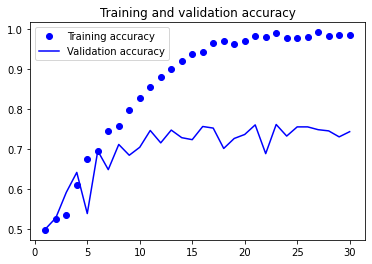

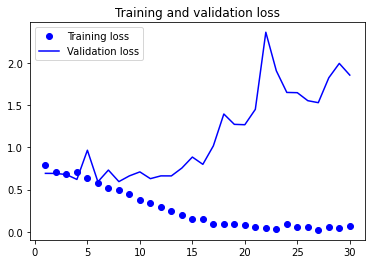

In [19]:
# Displaying curves fo loss and accuracy during training: 

import matplotlib.pyplot as plt 

accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']  
epochs = range(1, len(accuracy)+1) 

plt.plot(epochs, accuracy, 'bo', label='Training accuracy') 
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
plt.show() 

# Plots show the expected overfitting procces

In [20]:
# Evaluating the model on the test set: 

test_model = keras.models.load_model('convnet_from_scratch.keras') 
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}") 


63/63 [==============================] - 3s 39ms/step - loss: 0.6085 - accuracy: 0.6795
Test accuracy: 0.679


### Using data augmentation: 

In [22]:
# Generating more training data from existing training samples by 
# aumenting the samples via a number of rendom transformations: 

# Define a data augmentation stage to add an image model: 

data_augmentation = keras.Sequential( 
    [ 
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

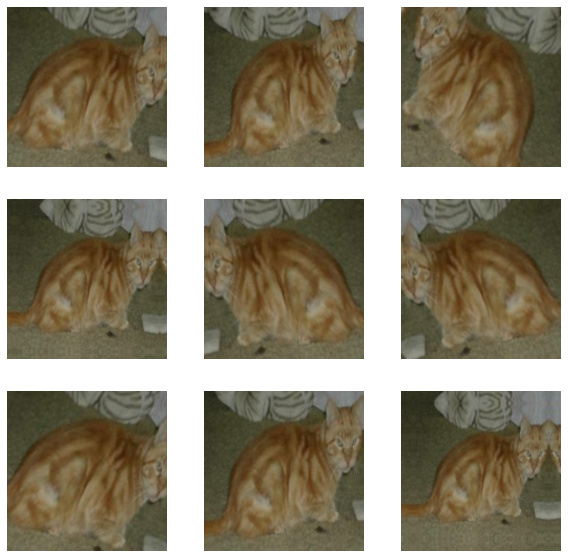

In [24]:
# Displaying some randomly augmented training images: 

plt.figure(figsize=(10, 10)) 

for images, _ in train_dataset.take(1): 
  for i in range(9):
    augmented_images = data_augmentation(images) 
    ax = plt.subplot(3, 3, i+1) 
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off') 
  

In [26]:
# Defining a new convnet that includes images augmentation and dropout: 

inputs = keras.Input(shape=(180, 180, 3)) 

x = data_augmentation(inputs) 

x = layers.Rescaling(1./255)(x) 
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x) 
x = layers.Dropout(0.5)(x) 

outputs = layers.Dense(1, activation='sigmoid')(x) 

model = keras.Model(inputs=inputs, outputs=outputs) 

model.compile(optimizer='rmsprop',
              loss='binar_crossentropy',
              metrics=['accuracy']) 

